In [1]:
# Import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [43]:
# Import Excel file into data frame
eagleford_df = pd.read_excel("Eagle Ford Data.xlsx")

In [49]:
# Get date after a year from First Production Date
cum365_year = pd.DatetimeIndex((eagleford_df['First Production Date']+np.timedelta64(1, 'Y'))).year

# Create and populate Cum365 Year column
eagleford_df['Cum365 Year'] = cum365_year

In [50]:
# Build cumulative production data frame
cum_prod_df = pd.DataFrame({
                           'Sub-play':eagleford_df['Sub-play'],
                           'Cum365 Oil (bbl)':eagleford_df['Cum365 Oil (bbl)'],
                           'Cum365 Gas (mcf)':eagleford_df['Cum365 Gas (mcf)'],
                           'Cum365 Total (boe)':eagleford_df['Cum365 Total (boe)'],
                           'Cum365 Year':eagleford_df['Cum365 Year'],
                           })

In [101]:
# Drop rows with missing production data
cum_prod_df = cum_prod_df.dropna(axis=0,how='any')

# Drop rows where Cum365 Year equals 2018
cum_prod_df.drop(cum_prod_df[cum_prod_df['Cum365 Year']==2018].index,inplace=True)

In [90]:
# Get boe conversion factor
boe_conv_factor = (cum_prod_df['Cum365 Total (boe)']-cum_prod_df['Cum365 Oil (bbl)'])/cum_prod_df['Cum365 Gas (mcf)']

# Convert Cum365 Gas (mcf) to boe
cum_prod_df['Cum365 Gas (boe)'] = boe_conv_factor*cum_prod_df['Cum365 Gas (mcf)']

In [112]:
# Calculate total production values by year and sub-play
cum_prod_values = cum_prod_df.groupby(['Cum365 Year']).sum()

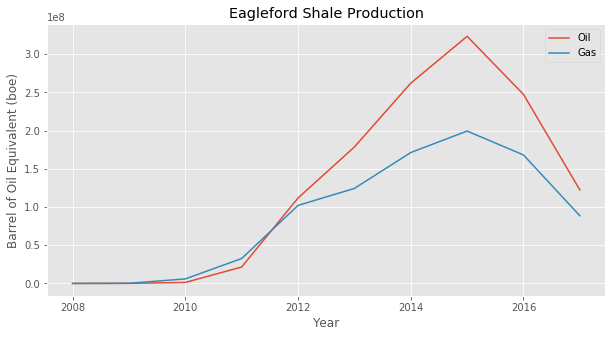

In [117]:
# Plot production values
with plt.style.context('ggplot'):
    cum_prod_values.loc[:,['Cum365 Oil (bbl)','Cum365 Gas (boe)']].plot(figsize=(10, 5),lines)

    # Add axis labels, title, and legend
    plt.title("Eagleford Shale Production")
    plt.ylabel("Barrel of Oil Equivalent (boe)")
    plt.xlabel("Year")
    plt.legend(['Oil', 'Gas'],loc='best')

    # Show plot
    plt.show()

plt.show()